In [113]:
import psopy
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import ACOframework as af
import random

problem = tsplib95.load_problem('ch130.tsp')
print(list(problem.get_nodes()))
problem.wfunc(13,12)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]


484

In [103]:
solution = tsplib95.load_solution('bays29.opt.tour')
problem.trace_tours(solution)

[3816]

In [3]:
import random
import math
def euclidean_2d_jitter(a, b):
    x1, y1 = a
    x2, y2 = b
    dist = math.sqrt((x2 - x1) ** 2 + ((y2 - y1) ** 2))
    return (dist * random.random() * 2)

In [68]:
graph = problem.get_graph()

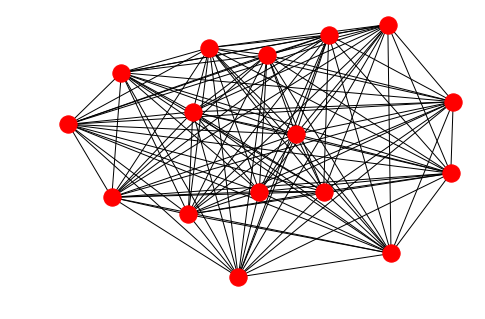

In [69]:
nx.draw(graph)

## Ant Colony Optimization

In [114]:
class TSPInstance():
    def __init__(self, problem):
        self.problem = problem
        self.n = len(list(self.problem.get_nodes()))
        print(self.n)
    def getNumVertices(self):
        return self.n

    def getWeight(self, u, v):
        return self.problem.wfunc(u + 1, v + 1)

In [115]:
class TSPAnt(af.ACS_Ant):
    def __init__(self, instance, **kwargs):
        self.instance = instance

        super().__init__(**kwargs)

    def getComponentCost(self, component):
        #print(*component)
        return self.instance.getWeight(*component)

    def constructSolution(self):
        # set of all vertices
        V = set(range(self.instance.getNumVertices()))

        # initial vertex - last added vertex
        u = 0

        # vertices in the solution
        U = set([u])

        while U != V:
            # the available components at the current iteration
            # are (u, v) where u is the last added vertex
            # and v is a vertex that has not been added
            components = [(u, v) for v in V - U]

            # select a component and update u
            _, u = self.makeDecision(components)

            U.add(u)

        # add last edge
        self.makeDecision([(u, 0)])

In [101]:
#print(problem.wfunc(1,2))
instance = TSPInstance(problem)
obj, components = af.Solve(antCls = TSPAnt, instance = instance, numIterations = 100, numAnts = 100, alpha = 1, beta = 1) 

130


KeyboardInterrupt: 

In [118]:
print(obj)
print()
print(components)
iterations = [1000]
ants = [50,100, 500]

12124

[(80, 37), (17, 7), (31, 110), (64, 51), (99, 115), (29, 89), (51, 74), (60, 108), (13, 32), (52, 119), (114, 44), (65, 27), (86, 80), (4, 123), (120, 77), (44, 75), (40, 38), (119, 71), (100, 64), (43, 41), (22, 39), (37, 91), (26, 18), (88, 93), (92, 48), (72, 86), (77, 58), (67, 62), (117, 1), (105, 73), (7, 113), (41, 50), (21, 46), (54, 121), (49, 3), (103, 42), (118, 70), (63, 85), (128, 25), (84, 65), (121, 13), (95, 54), (53, 105), (96, 6), (110, 122), (101, 9), (1, 53), (42, 126), (87, 63), (71, 90), (104, 61), (48, 57), (126, 128), (78, 94), (27, 114), (14, 88), (11, 118), (68, 109), (6, 87), (108, 10), (91, 0), (30, 33), (46, 17), (79, 45), (76, 97), (8, 55), (32, 20), (106, 103), (47, 67), (112, 35), (24, 47), (109, 112), (3, 16), (0, 40), (2, 82), (66, 95), (16, 30), (97, 69), (81, 56), (62, 106), (70, 36), (12, 66), (19, 78), (123, 68), (55, 102), (73, 24), (9, 12), (18, 99), (38, 129), (113, 2), (85, 4), (122, 100), (36, 21), (82, 116), (83, 31), (74, 72), (56, 8)

In [119]:
problems = ['ch130.tsp', 'tsp225.tsp']
for prob in problems:
    problem = tsplib95.load_problem(prob)
    for it in iterations:
        for ant in ants:
            instance = TSPInstance(problem)
            obj, components = af.Solve(antCls = TSPAnt, instance = instance, numIterations = it, numAnts = ant, alpha = 1, beta = 1)
            print(it, ant, obj)

130
1000 50 13045
130
1000 100 12740
130
1000 500 12791
225
1000 50 11938
225


KeyboardInterrupt: 

In [ ]:
plt.scatter(instance.xcoord, instance.ycoord)

In [ ]:
for path in components:
    print(path)
    print(instance.xcoord[path[0]])
    print(instance.ycoord[path[0]])
    

Graph has 5 nodes with 5 edges


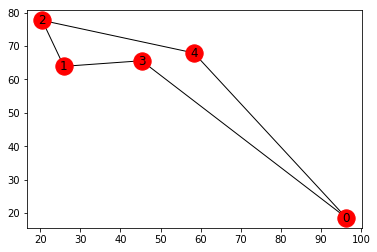

In [35]:
G=nx.Graph(name="buba")
routes = [[0,1,2,3,4]]
edges = [(1, 3), (3, 0), (2, 1), (0, 4), (4, 2)]
for r in routes:
     G.add_nodes_from(r)
G.add_edges_from(edges)

print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),    
G.number_of_edges()))
nx.draw_networkx(G,with_labels=True, pos=pos)
plt.savefig('this.png')
plt.show()